<a href="https://colab.research.google.com/github/johanhoffman/DD2363_VT22/blob/PeterTKovacs_lab6/Lab6/PeterTKovacs_lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lab 6: differential equations**


**Péter Kovács**

# **Abstract**

In this assignment, I implement basic timestepping methods to approximate the solutions of initial value problems.

I decided to go for the explicit Euler method in both the scalar and multidimensional case. The motivation for the choice is its simplicity and the fact that it can illustrate the problem of unstable timestepping as well.

For the extra assignment, I simulated trajectories of the Ito-process:

$dX=\mu X dt + \sigma X dW$

#**About the code**

A short statement on who is the author of the file, and if the code is distributed under a certain license. 

In [1]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2022 Péter Kovács (ptkovacs@kth.se)

# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

In [4]:
# Load neccessary modules.
from google.colab import files
import numpy as np
import random
import matplotlib.pyplot as plt


# **Introduction**

Solving initial value problems is very important, since dynamical phenomena are described by them.

There are multiple ways one can approach the problem. A canonical formualtion is:

$\mathbf{\dot{u}}=\mathbf{f}(\mathbf{u},t),~\mathbf{u}(0)=\mathbf{u_0}$

Timestepping methods work by subdividing the [0,T] time interval of interest into smaller timesteps, on which the evolution of $\mathbf{u}$ is estimated, usually from a first order Taylor expansion.

The exact details depend on the chosen scheme.
For the explicit Euler method, the approximation is updated as:
$U_n = U_{n-1} + (t_n-t_{n-1})\cdot f(U_{n-1},t_{n-1})$

Arguably, this is the simplest possible method one could even think of when trying to solve an initial value problem. The cost of the simplicity is that the stability properties of the method are unfavourable compared to other methods like the implicit Euler or the theta method.




##**Code**

### 0) explicit Euler in any dimension



In [3]:
def explicit_euler(f,T,u0,dt):
  '''
  explicit Euler method for solving systems of initial value problems

  arguments:
  f: function that maps (u,t) to the time derivative of u
  T: end of time interval
  u0: initial value
  dt: timestep, to be set by the experimenter
  '''

  n=int(T/dt)
  k=T/n

  U=np.zeros((n+1,u0.shape[0]),float)
  U[0,:]=u0

  for i in range(1,n+1):
    U[i]=U[i-1]+k*f(U[i-1],i*k)

  return U


### 1) explicit Euler in 1D

we test the method on two problems:

a) $\dot{u}=-u$

b) $\dot{u}=u-u^3$

the first problem is the archetype of first order ODEs, with having one stable point - 0 - and exact solution $e^{-t}$

the second equation is already nonlinear, our good friend from the homework assignments, stable points at -1,1 and an instable equilibrium point at 0

From general theory, we expect that by increasing timesteps, we reach a threshold value, above which the timestepping becomes unstable and will even deivate from the close vicinity of stable equilibrium points

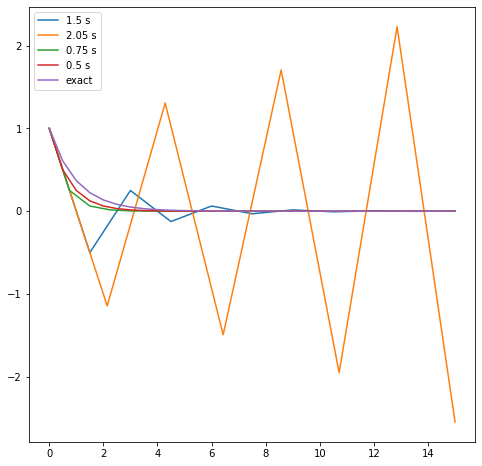

In [22]:
# test a)

U_15=explicit_euler(lambda x,y: -x, 15, np.array([1]),1.5)
U_205=explicit_euler(lambda x,y: -x, 15, np.array([1]),2.05)
U_075=explicit_euler(lambda x,y: -x, 15, np.array([1]),0.75)
U_05=explicit_euler(lambda x,y: -x, 15, np.array([1]),0.5)



plt.figure(figsize=(8,8))
for y in [(U_15,'1.5 s'),(U_205,'2.05 s'),(U_075,'0.75 s'),(U_05,'0.5 s')]:
  plt.plot(np.linspace(0,15,y[0].shape[0],endpoint=True),y[0],label=y[1])

x=np.linspace(0,15,U_05.shape[0],endpoint=True)
plt.plot(x,[np.exp(-i) for i in x],label='exact')

plt.legend()
plt.show()


we can see that choosing too big timesteps indeed results in instability in timestepping

general theory tells us that the threshold is 2 s in our case, and we expect the total error to be proportinal to the square of the timestep (in general, it would be the first order, but here the error accumulated during one step seems to be more informative, since in the end, stable methods all decline to 0)

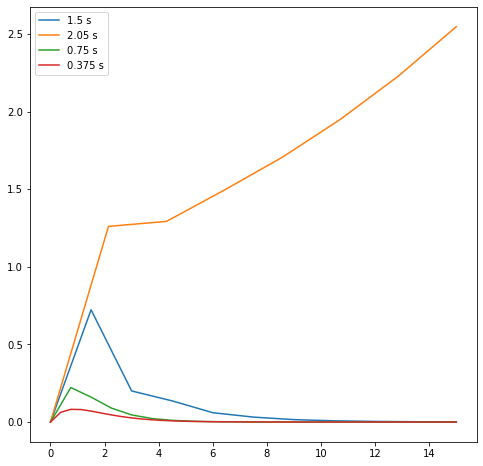

In [26]:
U_15=explicit_euler(lambda x,y: -x, 15, np.array([1]),1.5)
U_205=explicit_euler(lambda x,y: -x, 15, np.array([1]),2.05)
U_075=explicit_euler(lambda x,y: -x, 15, np.array([1]),0.75)
U_0375=explicit_euler(lambda x,y: -x, 15, np.array([1]),0.375)



plt.figure(figsize=(8,8))
for y in [(U_15,'1.5 s'),(U_205,'2.05 s'),(U_075,'0.75 s'),(U_0375,'0.375 s')]:
  x=np.linspace(0,15,y[0].shape[0],endpoint=True)
  plt.plot(x,[np.abs(np.exp(-x_)-y[0][i]) for i,x_ in enumerate(x)],label=y[1])

plt.legend()
plt.show()

plotting the absolute deviation from the exact value - more or less -confirms our conjectures

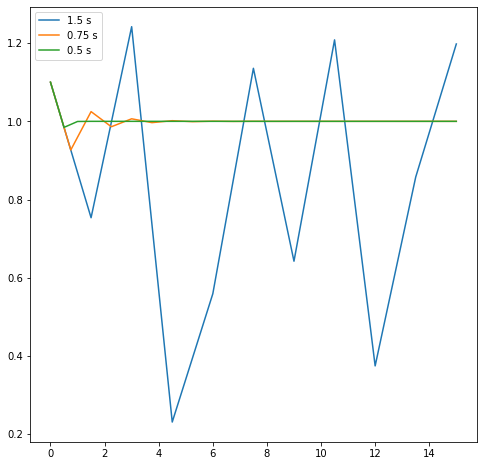

In [31]:
# test b)

U_15=explicit_euler(lambda x,y: x-x**3, 15, np.array([1.1]),1.5)
U_075=explicit_euler(lambda x,y: x-x**3, 15, np.array([1.1]),0.75)
U_05=explicit_euler(lambda x,y: x-x**3, 15, np.array([1.1]),0.5)



plt.figure(figsize=(8,8))
for y in [(U_15,'1.5 s'),(U_075,'0.75 s'),(U_05,'0.5 s')]:
  plt.plot(np.linspace(0,15,y[0].shape[0],endpoint=True),y[0],label=y[1])

plt.legend()
plt.show()

although we possess no general method to assess stability, from the linearized form we expect that instabilities kick in around 1 s timesteps.

So with smaller timesteps, we can test what happens around 0 (we expect the system to leave the vicinity of the origin and move to the stable fixpoint that is closer to the initial position)

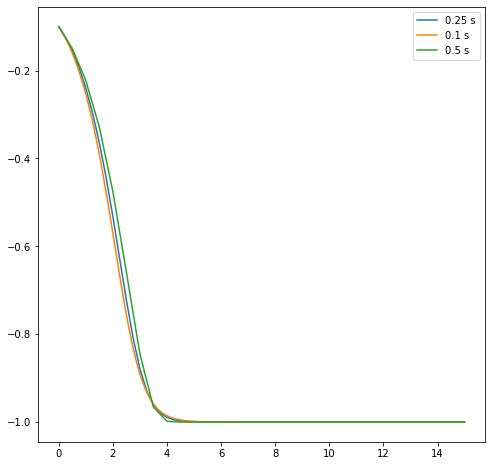

In [33]:
# test b)

U_025=explicit_euler(lambda x,y: x-x**3, 15, np.array([-0.1]),0.25)
U_01=explicit_euler(lambda x,y: x-x**3, 15, np.array([-0.1]),0.1)
U_05=explicit_euler(lambda x,y: x-x**3, 15, np.array([-0.1]),0.5)



plt.figure(figsize=(8,8))
for y in [(U_025,'0.25 s'),(U_01,'0.1 s'),(U_05,'0.5 s')]:
  plt.plot(np.linspace(0,15,y[0].shape[0],endpoint=True),y[0],label=y[1])

plt.legend()
plt.show()

Also, we can observe that significantly decreasing the timesteps does not influence the approximation so much

Thus by this 'convergence analysis' we conclude that we believe the above plot faithfully represents the true solution (Indeed, I think this is the spirit in which one analyzes convergence in an engineering setting, even though initial value problems are usually solved by some adaptive timestep method, so one is only to tune the spatial discretization)

### 2) explicit Euler for 2D problem

we test the harmonic oscillator:

$\dot{x}=v$

$\dot{v}=-x$

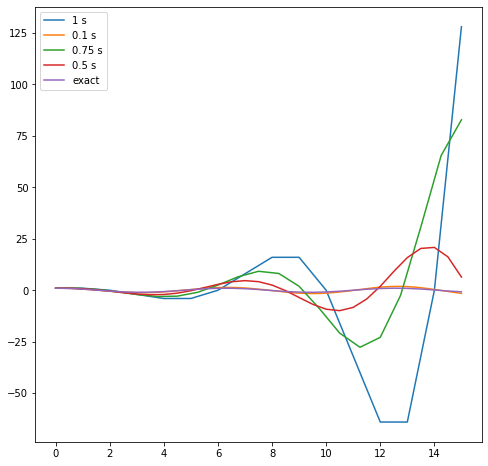

In [38]:
# test a)

U_1=explicit_euler(lambda x,t: np.array([x[1],-x[0]]), 15, np.array([1.,0.]),1)
U_01=explicit_euler(lambda x,t: np.array([x[1],-x[0]]), 15, np.array([1.,0.]),0.1)
U_075=explicit_euler(lambda x,t: np.array([x[1],-x[0]]), 15, np.array([1.,0.]),0.75)
U_05=explicit_euler(lambda x,t: np.array([x[1],-x[0]]), 15, np.array([1.,0.]),0.5)



plt.figure(figsize=(8,8))
for y in [(U_1,'1 s'),(U_01,'0.1 s'),(U_075,'0.75 s'),(U_05,'0.5 s')]:
  plt.plot(np.linspace(0,15,y[0][:,0].shape[0],endpoint=True),y[0][:,0],label=y[1])

x=np.linspace(0,15,U_05.shape[0],endpoint=True)
plt.plot(x,[np.cos(i) for i in x],label='exact')

plt.legend()
plt.show()

it seems that our timesteps are way too high!

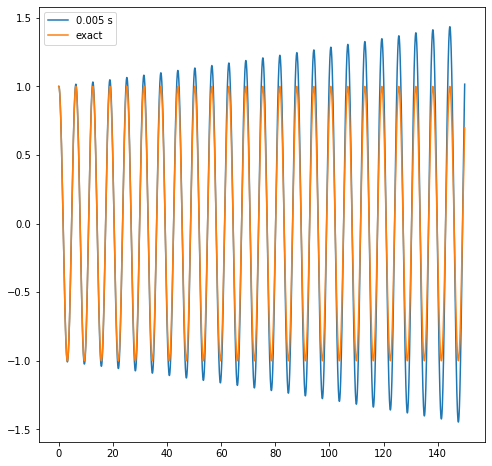

In [44]:
# test a)


U_05=explicit_euler(lambda x,t: np.array([x[1],-x[0]]), 150, np.array([1.,0.]),0.005)



plt.figure(figsize=(8,8))
for y in [(U_05,'0.005 s')]:
  plt.plot(np.linspace(0,150,y[0][:,0].shape[0],endpoint=True),y[0][:,0],label=y[1])

x=np.linspace(0,150,U_05.shape[0],endpoint=True)
plt.plot(x,[np.cos(i) for i in x],label='exact')

plt.legend()
plt.show()

even with much smaller timesteps, we encounter the problem of unconserved energy - a problem that should be circumvented trapezoidal stepping

### Extra assignment: 

simulating the stochastic differential equation:

$dX=\mu X dt + \sigma X dW$

In [45]:
def sde(dt,n,mu,sigma,x0):
  x=np.zeros(n+1,float)
  x[0]=x0

  for i in range(1,n+1):
    x[i]=x[i-1]+mu*x[i-1]*dt+sigma*x[i-1]*np.random.standard_normal()*np.sqrt(dt)

  return x

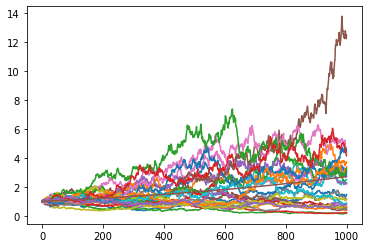

In [51]:
plt.figure()

for i in range(25):
  plt.plot(range(1001),sde(0.001,1000,1,1,1))

plt.plot(range(1001),[np.exp(x*0.001) for x in range(1001)])

plt.show()


from the raw trajectories, we cannot really determine if the theoretical expectation function is attained or not

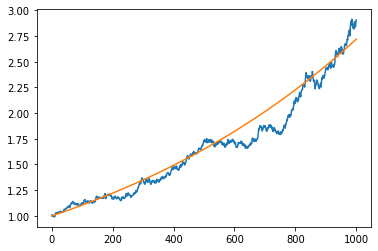

In [58]:
plt.figure()

y=[]

for i in range(25):
  y.append(sde(0.001,1000,1,1,1))

plt.plot(range(1001),np.mean(np.array(y),axis=0))
plt.plot(range(1001),[np.exp(x*0.001) for x in range(1001)])

plt.show()


averaging the trajectories gives a reassurance in our method

### conclusion

all the methods work as expected

we see that in a more complicated setting, the simplest timestepping method - explicit Euler fails, so it is crucial to choose the appropriate method and extensively test it before jumping to conclusions